# 시계열분석
## 1. 시계열 분석 개요
### 시계열 자료(time series data)
* 연도별, 분기별, 월별, 일별, 시간별 등 시간의 흐름에 따라 순서대로 관측되는 자료
* 예: GDP, 물가지수, 판매량, KOSPI, 강우량, 실험 및 관측자료 등
* 시간 단위 외에도 사회적 변화나 환경적 변동요인을 기준으로 시계열자료를 구분하는 경우도 있음
* 일반적으로 시계열 자료는 추세변동, 순환변동, 계절변동, 불규칙변동 요인으로 구성
* Countinuous time series / Discrete time series
* 실제로 많은 시계열들이 연속적으로 생성, 일정 시차를 두고 관측 → 이산시계열 형태를 지니는 경우가 많음

### 시계열 분석 개요(the nature of time series analysis)
* 시계열 자료들은 시간의 경과에 따라 관측, 시간에 영향 받음
    * 시계열 자료를 분석할 때 관측시점들 간의 시차(time lag)가 중요한 역할을 함
    * 관측 시점과 가까운 관측 시점의 자료들의 상관관계가 더 큼
    * 시계열은 일반적으로 시간 t를 하첨자로 하여 $[Z_t : t = 1, 2, 3, ...]$
* 시계열 분석의 목적
    * 과거 시계열자료의 패턴이 미래에도 지속적으로 유지된다는 가정하에서 현재까지 수집된 자료들을 분석하여 미래에 대한 예측(forecast)을 한다
    * 시계열자료를 분석할 때 관측시점들 간의 시차가 중요한 역할을 함
    * 시계열자료가 생셩된 시스템 또는 확률과정을 모형화하여 시스템 또는 확률과정을 이해하고 제어(control)할 수 있게 함
* 예측, 계획 그리고 목표
    * **예측**은 경영분야에 있어서 생산 계획, 수송, 인사에 관한 결정을 알리거나 장기 전략계획을 세우는데 도움을 줄 수 있는 흔한 통계적 업무
    * **목표**는 예측 및 계획과 연관되어 있는 것이 좋지만, 항상 일어나는 것은 아님. 목표를 어떻게 달성할지에 대한 계획과 목표가 실현 가능한지에 대한 예측 없이 목표를 세우는 경우가 너무 많음
    * **계획**은 예측과 목표에 대한 대응. 계획은 예측과 목표를 일치시키는데 필요한 적절한 행동을 결정하는 일을 포함. 

##### 시계열 분석 개요 코드

In [237]:
# 추세변동(trend variation)

import numpy as np
import pandas as pd

# DatetimeIndex
dates = pd.date_range("2020-01-01", periods=48, freq="M")
# pd.date_range → 시작지점부터 월 freq 주면 월별 끝날짜

# additive model : tredn + cycle + seasonality + irregular factor
timestamp = np.arange(len(dates))
trend_factor = timestamp*1.1
cycle_factor = 10 * np.sin(np.linspace(0, 3.14 * 2, 48))
sesonal_factor = 7 * np.sin(np.linspace(0, 3.14 * 8, 48))
np.random.seed(2004)
irregular_factor = 2 * np.random.randn(len(dates))

df = pd.DataFrame({"timeseries": trend_factor + cycle_factor + sesonal_factor + irregular_factor,
                "trend" : trend_factor,
                "cycle" : cycle_factor,
                "seasonal" : sesonal_factor,
                "irregular" : irregular_factor},
                index=dates)

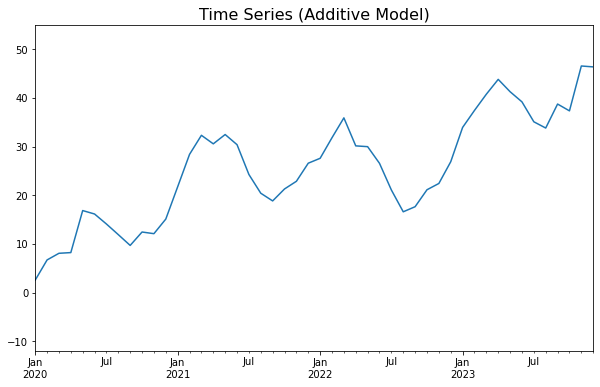

In [238]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
df.timeseries.plot()
plt.title("Time Series (Additive Model)", fontsize=16)
plt.ylim(-12, 55)
plt.show()

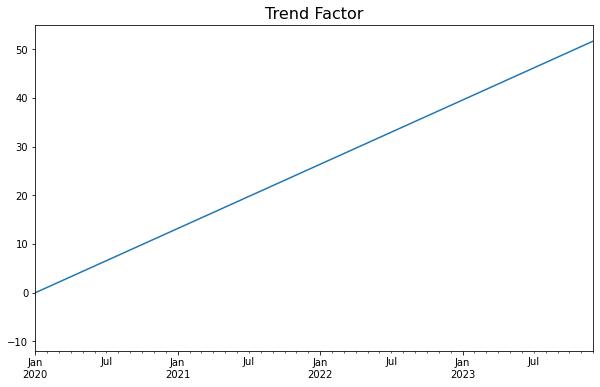

In [239]:
# -- Trend variation
# timestamp = np.arange(len(dates))
# trend_factor = timestamp * 1.1

plt.figure(figsize=[10,6])
df.trend.plot()
plt.title("Trend Factor", fontsize=16)
plt.ylim(-12, 55)
plt.show()

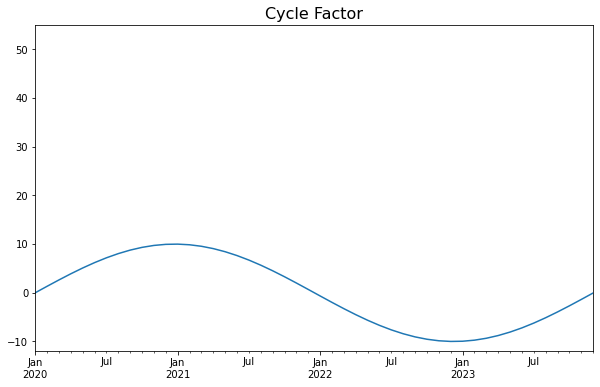

In [240]:
# 순환변동(cyclical variation)

# 4년 주기
# -- Cycle variation
# cycle_factor = 10 * np.sin(np.linspace(0, 3.14 * 2, 48))

plt.figure(figsize=[10,6])
df.cycle.plot()
plt.title("Cycle Factor", fontsize=16)
plt.ylim(-12, 55)
plt.show()

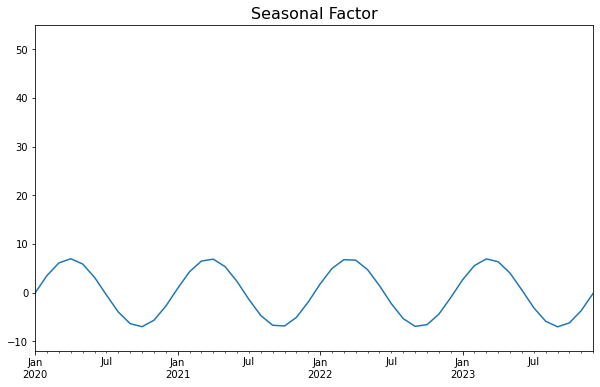

In [241]:
# 계절변동(seasonal variation)

# -- Seasonal factor
# sesonal_factor = 7 * np.sin(np.linspace(0, 3.14 * 8, 48))

plt.figure(figsize=[10,6])
df.seasonal.plot()
plt.title("Seasonal Factor", fontsize=16)
plt.ylim(-12, 55)
plt.show()

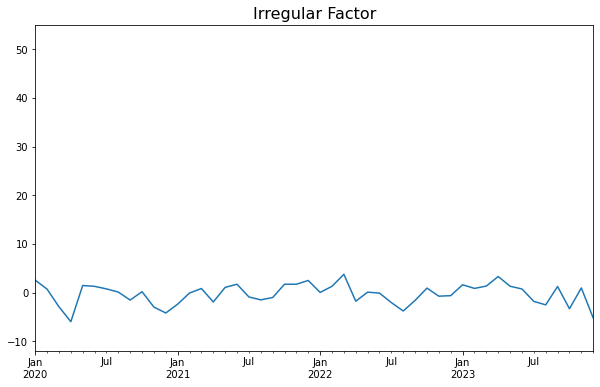

In [242]:
# 불규칙변동(irregular variation or random variation)

# -- Irregular factor
# irregular_factor = 2 * np.random.randn(len(dates)) where np.random.seed(2004)

plt.figure(figsize=[10,6])
df.irregular.plot()
plt.title("Irregular Factor", fontsize=16)
plt.ylim(-12, 55)
plt.show()

(-12.0, 55.0)

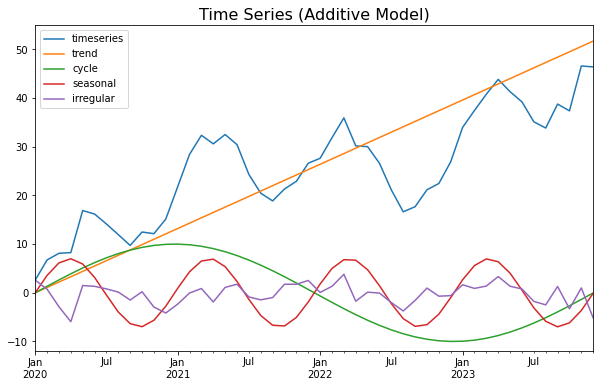

In [243]:
# Time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
plt.title("Time Series (Additive Model)", fontsize=16)
df.timeseries.plot()
df.trend.plot()
df.cycle.plot()
df.seasonal.plot()
df.irregular.plot()
plt.legend()
plt.ylim(-12, 55)


## 2. 평활화 기법(Smoothing Methods)
* 데이터 셋을 모델링 하기 전에 기술통계와 시각화로 데이터셋을 탐색하는 과정이 있듯, 시계열에서도 복잡한 모델 구성에 앞서 수치나 시각화로 시계열을 기술하는 일이 분석작업의 출발점.
* 평활화는 분석잡업 중 하나로, 시계열의 복잡한 추세(trend)를 명확하게 파악하기 위한 방법
* 시계열은 전형적으로, 명백한 불규칙(or 오차)성분을 포함
* 시계열 자료는 특정 패턴을 파악하기 위해, 이같은 급격한 파동을 줄이는 평활화, 곡선 플롯으로 변환시키는 방법이 평활법. 대표적인 평활법은 이동평균법과 지수평활법

### 이동평균법(moving average method)
* 시계열을 평활화하는 가장 단순한 방법
* 시계열 자료의 특정시점(a time point) 관측치와 이 관측치의 이전과 이후 관측치의 평균으로 대체하는 방법을 "중심이동평균"(centered moving average)라고 함. 한 시점 앞 뒤 관측치를 평균내는 방법. 따라서 이평법을 하면 전체 관측치의 개수가 줄어듦
* 3기간 M3, 5기간 M5 등
* 이평을 이용할 때 가장 중요한 문제는 사용하는 과거자료의 적정개수, n의 크기
* 시계열에 뚜렷한 추세 존재, 불규칙 변동 심하지 않으면 작은 n의 개수 사용, 그렇지 않은 경우 n의 개술를 크게 함.     
$M_t = \frac{Z_t + Z_{t-1} + ... + Z_{t-n+1}}{n}$

#### Simple Moving Average(SMA)
* pandas.DataFrame.rolling
  * DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')

* Parameters

**window** : int, offset, or BaseIndexer subclass

Size of the moving window.

If an integer, the fixed number of observations used for each window.

If an offset, the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for datetimelike indexes. To learn more about the offsets & frequency strings, please see  [this link](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

If a BaseIndexer subclass, the window boundaries based on the defined  `get_window_bounds`  method. Additional rolling keyword arguments, namely  `min_periods`,  `center`, and  `closed`  will be passed to  `get_window_bounds`.

**min_periods** : int, default None

Minimum number of observations in window required to have a value; otherwise, result is  `np.nan`.

For a window that is specified by an offset,  `min_periods`  will default to 1.

For a window that is specified by an integer,  `min_periods`  will default to the size of the window.

**center** : bool, default False

If False, set the window labels as the right edge of the window index.

If True, set the window labels as the center of the window index.

**win_type** : str, default None

If  `None`, all points are evenly weighted.

If a string, it must be a valid  [scipy.signal window function](https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows).

Certain Scipy window types require additional parameters to be passed in the aggregation function. The additional parameters must match the keywords specified in the Scipy window type method signature.

**on** : str, optional

For a DataFrame, a column label or Index level on which to calculate the rolling window, rather than the DataFrame’s index.

Provided integer column is ignored and excluded from result since an integer index is not used to calculate the rolling window.

**axis** : int or str, default 0

If  `0`  or  `'index'`, roll across the rows.

If  `1`  or  `'columns'`, roll across the columns.

**closed** : str, default None

If  `'right'`, the first point in the window is excluded from calculations.

If  `'left'`, the last point in the window is excluded from calculations.

If  `'both'`, the no points in the window are excluded from calculations.

If  `'neither'`, the first and last points in the window are excluded from calculations.

Default  `None`  (`'right'`).

Changed in version 1.2.0: The closed parameter with fixed windows is now supported.

**method** : str {‘single’, ‘table’}, default ‘single’

New in version 1.3.0.

Execute the rolling operation per single column or row (`'single'`) or over the entire object (`'table'`).

This argument is only implemented when specifying  `engine='numba'`  in the method call.

Returns

`Window`  subclass if a  `win_type`  is passed

`Rolling`  subclass if  `win_type`  is not passed

##### 애플 주가 분석 예제

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 2020년 8월부터 일요일 8개를 조회
# start : 시작일, periods : 생설할 날짜의 개수, freq : 생성할 날짜의 주기
date = pd.date_range(start="2020-08", periods=8, freq="W")

# 데이터 프레임 컬럼으로 사용했을 때와 3주치 평균 컬럼을 추가
df = pd.DataFrame({
    "week" : date,
    "sales" : [39,44,40,45,38,43,39,np.nan],
    "3MA" : [0]*8
})

# 0~2 주차 평균을 3주차에 shift해서 적용
df["3MA"] = df[["sales"]].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2020-08-02,39.0,NaN
1,2020-08-09,44.0,NaN
2,2020-08-16,40.0,NaN
3,2020-08-23,45.0,41.0
4,2020-08-30,38.0,43.0
5,2020-09-06,43.0,41.0
6,2020-09-13,39.0,42.0
7,2020-09-20,NaN,40.0


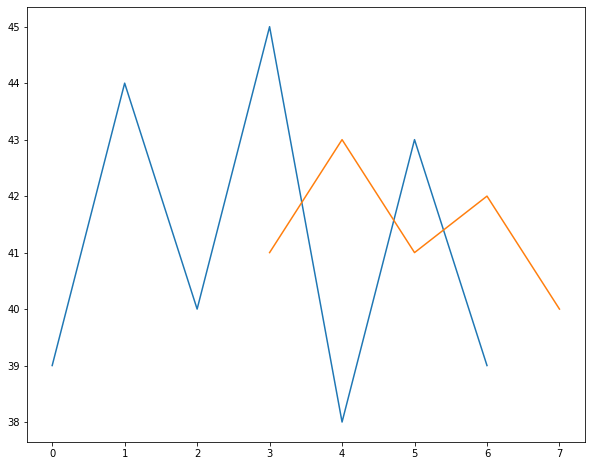

In [245]:
plt.figure(figsize=(10,8))
df.sales.plot()
df["3MA"].plot()
plt.show()

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import FinanceDataReader as fdr

# 2010년~현재까지의 애플 주가를 데이터 프레임으로 불러옴
df_apple = fdr.DataReader("AAPL", start="2010")

# 가장 마지막(최신)의 10일치 주가 출력
df_apple.tail(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-04-01,174.31,174.03,174.88,171.94,78750000.0,-0.0017
2022-04-04,178.44,174.57,178.49,174.44,76210000.0,0.0237
2022-04-05,175.06,177.50,178.30,174.41,70900000.0,-0.0189
2022-04-06,171.83,172.36,173.63,170.13,88670000.0,-0.0185
2022-04-07,172.14,171.16,173.36,169.85,74950000.0,0.0018
2022-04-08,170.09,171.78,171.78,169.20,76580000.0,-0.0119
2022-04-11,165.75,168.71,169.03,165.50,71550000.0,-0.0255
2022-04-12,167.66,168.02,169.87,166.64,78990000.0,0.0115
2022-04-13,170.40,167.39,171.04,166.77,70190000.0,0.0163


Text(0.5, 1.0, 'Close Price for Apple')

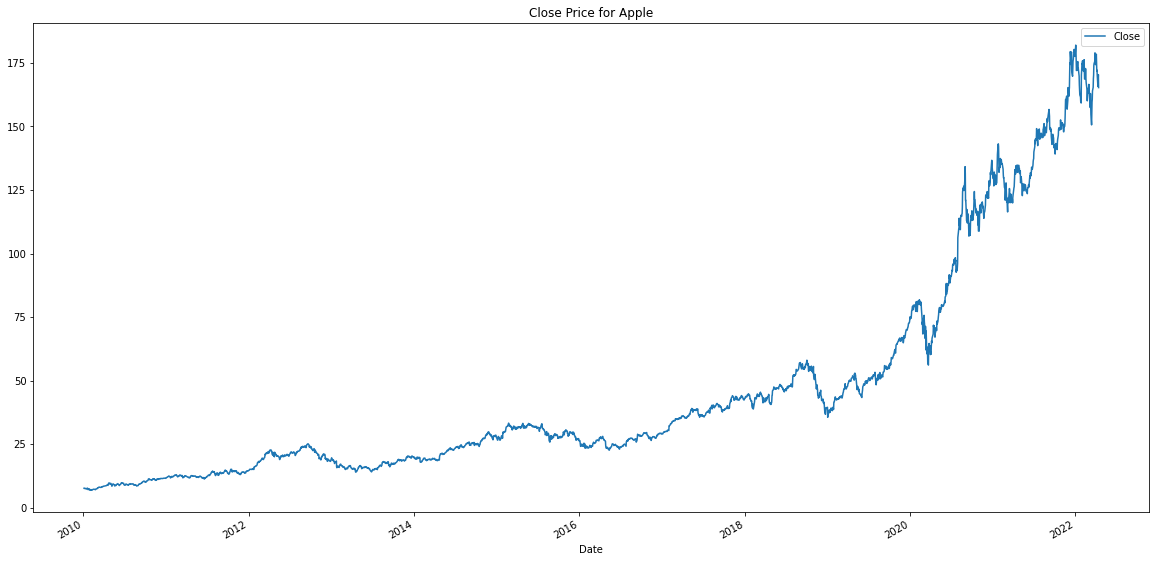

In [247]:
df_apple[["Close"]].plot(figsize=(20,10))
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean()
plt.title("Close Price for Apple")

<AxesSubplot:xlabel='Date'>

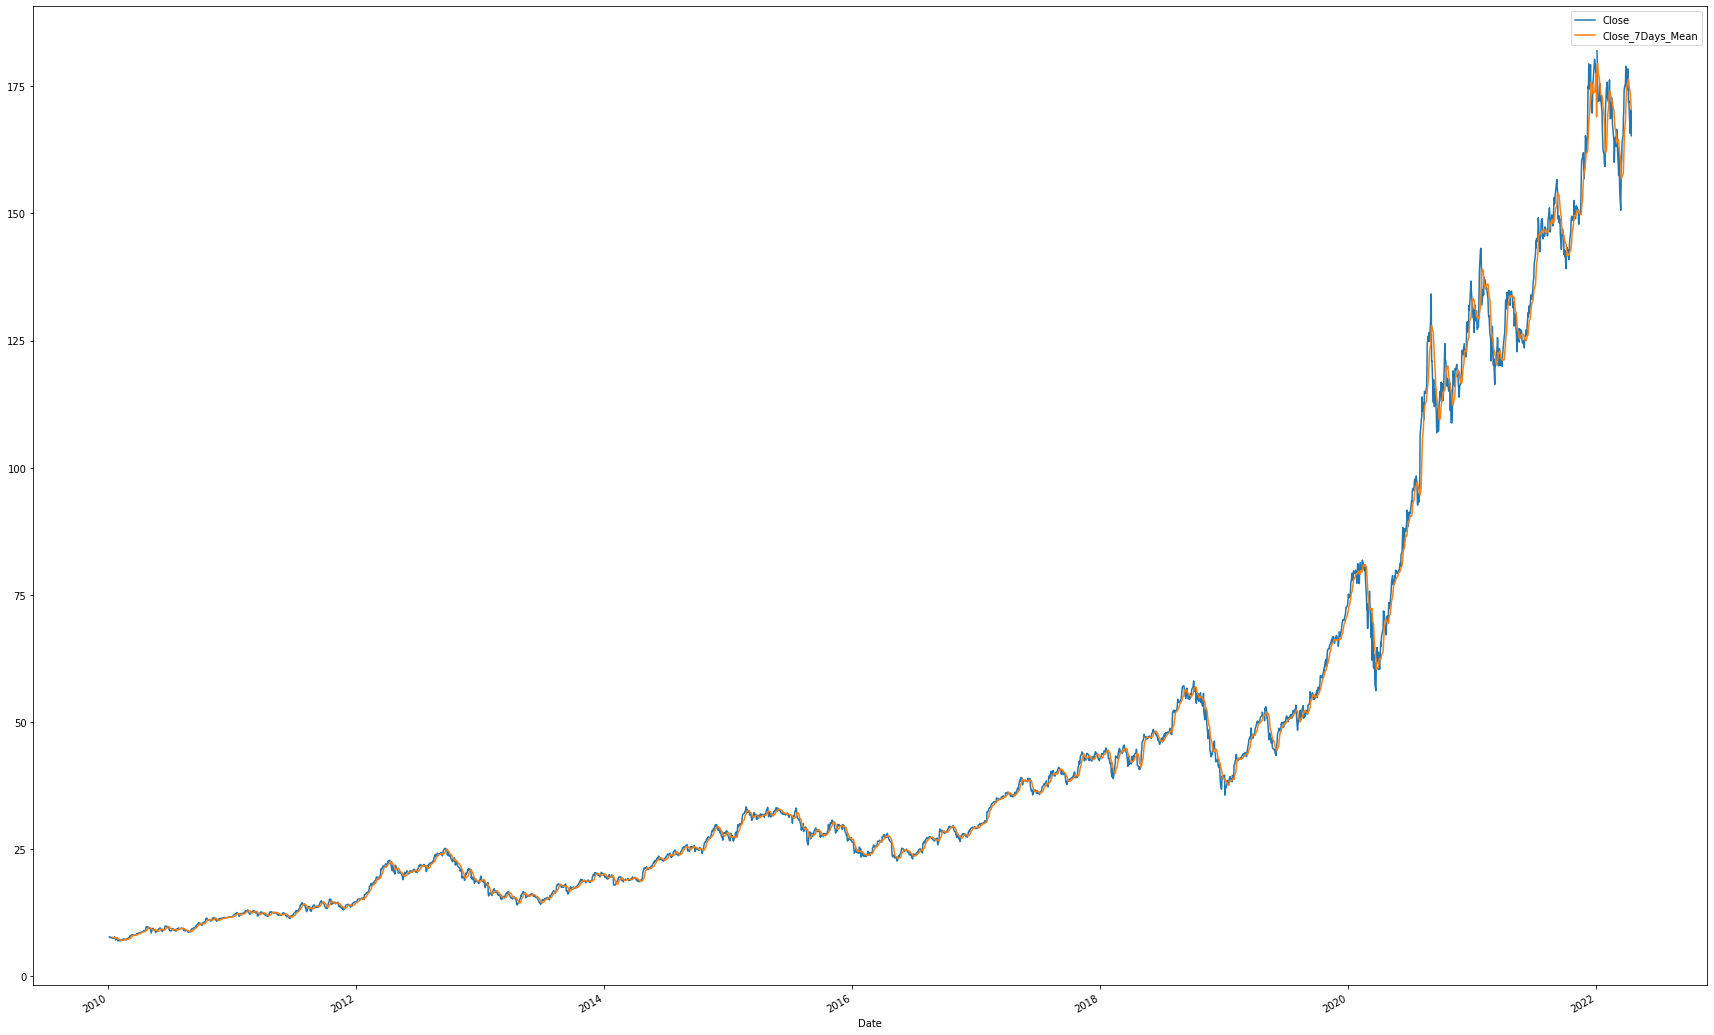

In [248]:
# 2010~2022년까지 애플의 종가 그래프에 7일전 평균값을 shift 하여 이평 그래프를 추가함.
# 7일 평균값으로 부드러워진 곡선 그래프를 확인할 수 있음.

last_day = datetime(2022,1,2)
df_apple.loc[last_day, "Close"] = np.nan
df_apple["Close_7Days_Mean"] = df_apple["Close"].rolling(7).mean().shift(1)
df_apple[["Close", "Close_7Days_Mean"]].plot(figsize=(30,20))

# 7일전 평균값 그래프 + 종가 그래프


Text(0.5, 1.0, 'Monthly Mean Close Price for Apple')

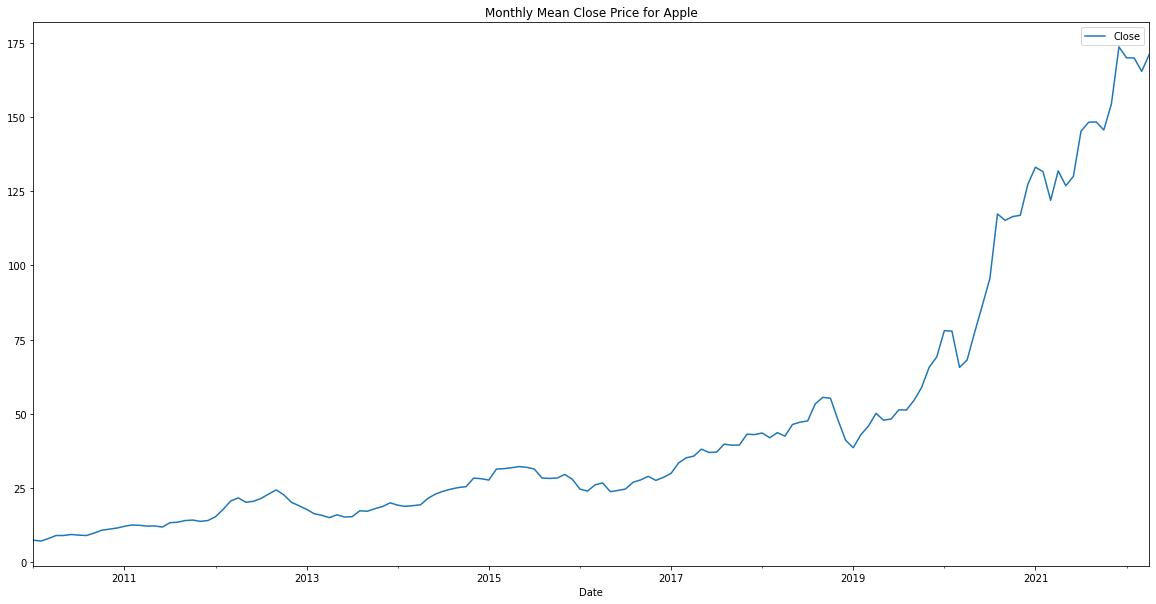

In [249]:
# pandas DataFrame에는 resample이라는 데이터프레임의 시계열 인덱스 기준으로 샘플링을
# 편하게 해주는 메소드가 있음. 아래와 같이하면 월단위로 시계열 데이터를 다시 만들어 줌.

# 월단위로 주식 가격의 평균을 샘플링  /  resample 함수
df_apple_monthly = df_apple.resample(rule="M").mean()

# 마지막 컬럼(Close_7Days_Mean) 제외
df_apple_monthly = df_apple_monthly.iloc[:, :-1]

# 월별 주가(종가)를 시각화
df_apple_monthly[["Close"]].plot(figsize=(20,10))
plt.title('Monthly Mean Close Price for Apple')

<AxesSubplot:xlabel='Date'>

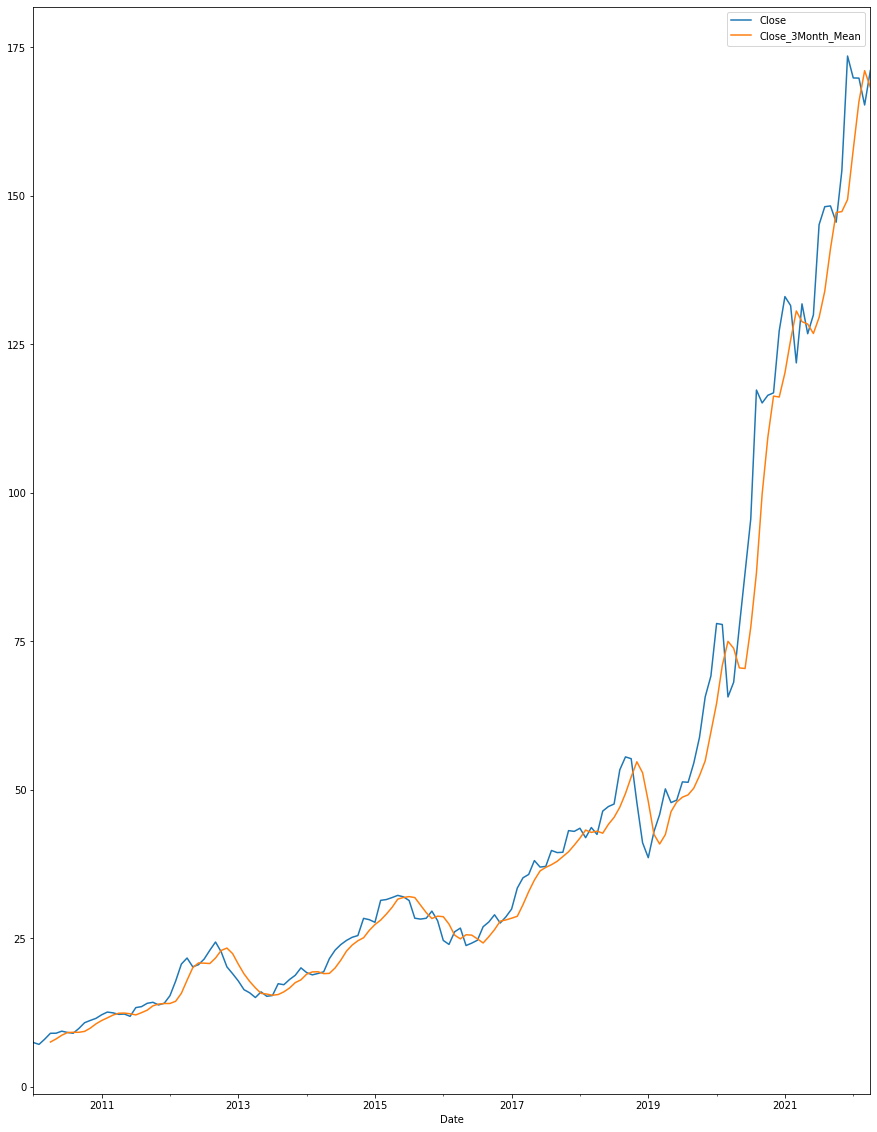

In [250]:
# 월단위 평균값을 또 3개월치씩 이동평균을 적용하는 코드
df_apple_monthly[["Close_3Month_Mean"]] = df_apple_monthly[["Close"]].rolling(3).mean().shift(1)
df_apple_monthly[["Close", "Close_3Month_Mean"]].plot(figsize=(15,20))

<AxesSubplot:xlabel='Date'>

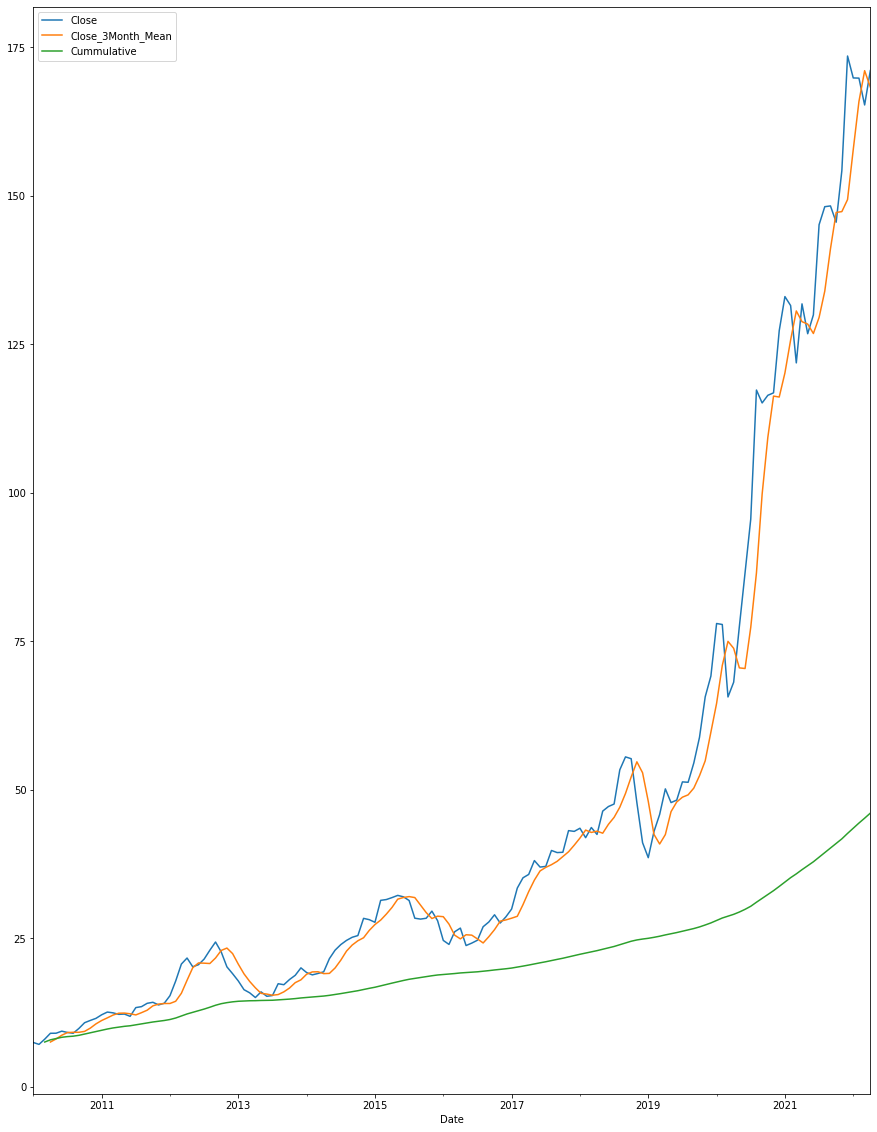

In [251]:
df_apple_monthly["Cummulative"] = df_apple_monthly["Close"].expanding(3).mean()
df_apple_monthly[["Close", "Close_3Month_Mean", "Cummulative"]].plot(figsize=(15,20))

### Exponential Mobing Average(EMA)
* EMA는 새로운 데이터에 더 큰 가중치 부여하여 최근 데이터에 더욱 초점을 맞춤
* EMA는 모든 값에 동일한 가중치가 주어지는 SM에 비해 추세변화에 더 민감함
* pandas.Series.ewm()
  * DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None, method='single')
* Exactly one parameter:  `com`,  `span`,  `halflife`, or  `alpha`  must be provided.

* Parameters

**com** : float, optional

Specify decay in terms of center of mass

$α=\frac{1}{(1+com)}$, for  $com≥0$.

**span** : float, optional

Specify decay in terms of span

$α=\frac{2}{(span+1)}$, for  $span≥1$.

**halflife** : float, str, timedelta, optional

Specify decay in terms of half-life

$α=1−exp⁡(\frac{−ln⁡2}{halflife})$, for  $halflife>0$.

If  `times`  is specified, the time unit (str or timedelta) over which an observation decays to half its value. Only applicable to  `mean()`, and halflife value will not apply to the other functions.

New in version 1.1.0.

**alpha** : float, optional

Specify smoothing factor  α  directly

0<$α$≤1.

**min_periods** : int, default 0

Minimum number of observations in window required to have a value; otherwise, result is  `np.nan`.

**adjust** : bool, default True

Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average).

-   When  `adjust=True`  (default), the EW function is calculated using weights  $wi=(1−α)^i$. For example, the EW moving average of the series $[x_0,x_1,...,x_t]$ would be:
    

$y_t=\frac{x_t+(1−α)x_{t−1}+(1−α)^2x_{t−2}+...+(1−α)^tx_0}{1+(1−α)+(1−α)^2+...+(1−α)^t}$

-   When  `adjust=False`, the exponentially weighted function is calculated recursively:
    

$y_0=x_0$
$y_t=(1−α)y_{t−1}+αx_t$,

**ignore_na** : bool, default False

Ignore missing values when calculating weights.

-   When  `ignore_na=False`  (default), weights are based on absolute positions. For example, the weights of  $x_0$  and  $x_2$  used in calculating the final weighted average of $[x_0, None,  x_2]$ are  $(1−α)^2$  and  $1$  if  `adjust=True`, and  $(1−α)^2$  and  $α$  if  `adjust=False`.
    
-   When  `ignore_na=True`, weights are based on relative positions. For example, the weights of  $x_0$  and  $x_2$  used in calculating the final weighted average of $[x_0, None,  x_2]$ are  $1−α$  and  $1$  if  `adjust=True`, and  $1−α$  and  $α$  if  `adjust=False`.
    

**axis** : {0, 1}, default 0

If  `0`  or  `'index'`, calculate across the rows.

If  `1`  or  `'columns'`, calculate across the columns.

**times** : str, np.ndarray, Series, default None

New in version 1.1.0.

Only applicable to  `mean()`.

Times corresponding to the observations. Must be monotonically increasing and  `datetime64[ns]`  dtype.

If 1-D array like, a sequence with the same shape as the observations.

Deprecated since version 1.4.0: If str, the name of the column in the DataFrame representing the times.

**method** : str {‘single’, ‘table’}, default ‘single’

New in version 1.4.0.

Execute the rolling operation per single column or row (`'single'`) or over the entire object (`'table'`).

This argument is only implemented when specifying  `engine='numba'`  in the method call.

Only applicable to  `mean()`

Returns : 

`ExponentialMovingWindow`  subclass

##### EMA 예제

<AxesSubplot:xlabel='index'>

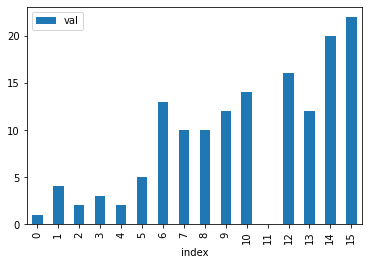

In [252]:
import pandas as pd
import numpy as np

data = {"val" : [1,4,2,3,2,5,13,10,10,12,14,np.NaN,16,12,20,22]}
df = pd.DataFrame(data).reset_index()
# df["val"].plot.bar(rot=0, subplot=True)
df.plot(kind="bar", x="index", y="val")

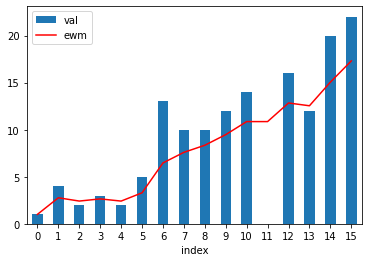

In [253]:
import matplotlib.pyplot as plt

# val열에 ewm 메서드 적용 후 df에 추가
df2 = df.assign(ewm=df["val"].ewm(alpha=0.3).mean())

# ax2에 df2의 line chart 생성후 ax에 추가
ax = df.plot(kind="bar", x="index", y="val")
ax2 = df2.plot(kind="line", x="index", y="ewm", color="red", ax=ax)

plt.show()

In [254]:
# myEWMA는 지수이동평균값을 df.ewm(span=3).mean()과 같이 계산해주도록 정의한 메소드

import pandas as pd
import numpy as np

In [255]:
df = pd.DataFrame({
    "week" : pd.date_range(start="2020-08", periods=8, freq="W"),
    "sales" : [39,44,40,45,38,43,39,np.nan],
    "3EMA" : [0]*8
})

# 지수 이동 평균을 계산할 함수
# data : 지수 이동 평균을 계산할 데이터
# span : 지수이동평균의 거리

In [256]:
def myEWMA(data, span) :
    # 지수 이평을 계산해서 저장할 리스트
    ewma = [0]*len(data)
    # 지수 이평의 분자
    molecule = 0
    # 지수이평의 평균분모
    denominator = 0
    # 값에 곱해지는 가중치
    alpha = 2.0 / (1.0+span)
    
    for i in range(len(data)) :
        # 분자계산 data(1-alpha)앞의 데이터 / 누적되어서 옛날 데이터 영향 작아짐
        molecule = (data[i] + (1.0-alpha)*molecule)
        # 분모계산 (1-alpha)의 i승 / 
        denominator += (1-alpha)**i
        print("index", i)
        print("molecule", molecule)
        print("denominator", denominator)
        # 지수 이동 평균 계산
        ewma[i] = molecule/denominator
        print("ewma", ewma[i])
        print("="*30)
    
    return ewma

In [257]:
df["ewma"] = myEWMA(df['sales'], 3)

index 0
molecule 39.0
denominator 1.0
ewma 39.0
index 1
molecule 63.5
denominator 1.5
ewma 42.333333333333336
index 2
molecule 71.75
denominator 1.75
ewma 41.0
index 3
molecule 80.875
denominator 1.875
ewma 43.13333333333333
index 4
molecule 78.4375
denominator 1.9375
ewma 40.483870967741936
index 5
molecule 82.21875
denominator 1.96875
ewma 41.76190476190476
index 6
molecule 80.109375
denominator 1.984375
ewma 40.37007874015748
index 7
molecule nan
denominator 1.9921875
ewma nan


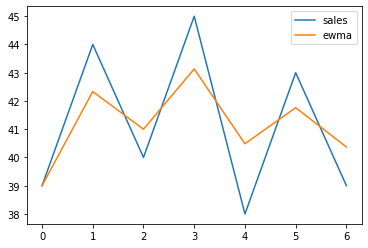

In [258]:
df["sales"].plot()
df["ewma"].plot()
plt.legend()
plt.show()

index 0
molecule 7.416842105263157
denominator 1.0
ewma 7.416842105263157
index 1
molecule 10.80842105263158
denominator 1.5
ewma 7.20561403508772
index 2
molecule 13.382471395881009
denominator 1.75
ewma 7.647126511932005
index 3
molecule 15.660283316988123
denominator 1.875
ewma 8.352151102393666
index 4
molecule 16.809641658494062
denominator 1.9375
ewma 8.675944081803387
index 5
molecule 17.731184465610667
denominator 1.96875
ewma 9.00631591904034
index 6
molecule 17.97083032804343
denominator 1.984375
ewma 9.056166464525823
index 7
molecule 17.960869709476263
denominator 1.9921875
ewma 9.01565224632534
index 8
molecule 18.76091104521432
denominator 1.99609375
ewma 9.398812578424396
index 9
molecule 20.12759837975002
denominator 1.998046875
ewma 10.07363672573999
index 10
molecule 21.19379918987501
denominator 1.9990234375
ewma 10.602076390049833
index 11
molecule 22.078263231301143
denominator 1.99951171875
ewma 11.041827374286871
index 12
molecule 23.12413161565057
denominator 1.

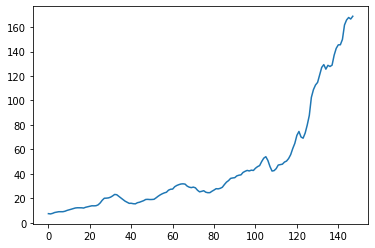

In [259]:
plt.plot(myEWMA(df_apple_monthly["Close"], 3))

## 3.자기상관과 부분 자기상관
### 시차를 적용한 시계열 데이터
* 자기상관은 시차(lag)를 적용한 시계열 데이터를 이용하여 계산
* 시차를 적용한다는 것은 특정 시차만큼 관측값을 뒤로(즉 과거의 시점으로) 이동시키는 것을 의미
### 자기상관함수(ACF; Auto-Correlation Function)
* 자기상관은 다른 시점의 관측값 간 상호 연관성을 나타내므로 이는 시차를 적용한 시계열 데이터 간의 상관관계를 의미
* 자기상관 $AC_k$는 원래의 시계열 데이터$(y_t)$와 $k$ 시차가 고려된, 즉 k 기간 뒤로 이동한 시계열데이터 $(y_{t-k})$ 간의 상관관계로 정의
  * 예를 들어, $AC_1$은 시차0 시계열 데이터와 시차1 시계열 데이터 간의 상관관계
  * $AC_0$는 동일한 시계열 데이터 간의 상관관계이므로 언제나 1
### 편자기상관함수
* 편자기상관(partial autocorrelation)은 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타냄
* 편자기상관 $PAC_k$는 원래의 시계열 데이터 $(y_t)$와 시차$k$ 시계열 데이터 $(y_{t-k})$ 간의 순수한 상관관계로서 두 시점 사이에 포함된 모든 시계열 데이터(y_{t-1},y_{t-2},...,y_{t-k+1})의 영향은 제거됨
* 시차에 따른 일련의 편자기상관 $\{PAC_1,PAC_2,...,PAC_k\}$를 편자기상관함수(PACF)라고 함

## 중요! 정상성
* 정상성(stationarity)을 나타내는 시계열의 특징은 관측된 시간과 무관함
* 즉 $Y_t$가 정상성을 나타내는 시계열이라면, 모든 $s$에 대해 $[Y_t, Y_{t+1}, ..., Y_{t+s}]$의 분포에서 $t$와 무관함
* 따라서 추세나 계절성이 있는 시계열은 정상성을 나타내는 시계열이 아님.   
장기적으로 볼때, 예측할 수 있는 패턴을 나타내지 않을 것임.    
어떤 주기적인 행동이 있다 할지라도, 시간 그래프는 일정한 분산을 가지고 시계열의 평균이 시간축에 평행한 형태.
* 시계열 자료가 시계열 모형으로 적합시키기 위한 전제 조건에 해당함. 즉, 추세와 동향이 있는 상태로는 모형을 만들기 어려움.
### 차분(differencing)
* 차분은 시계열 수준에서 나타나는 변화를 제거하여 시계열의 평균 변화를 일정하게 만드는 것을 도움
* 결과적으로 추세나 계절성이 제거(또는 감소)되는 것
* ACF는 어떤 무작위의 신호가 두 시각에 취하는 값의 상관계수를 나타내는 함수
### 정상 시계열로의 변환
* 변동폭이 일정하지 않으면 로그 변환을 통해 시간의 흐름에 따라 분산이 일정하게 유지되는 정상 시계열로 변환
* 추세나 계절적 요인이 관찰되면 차분(differencing, 시계열 $y_t$의 각 관측값을 $y_t-y_{t-1}$로 대체) 과정을 통해 전 기간에 걸쳐 평균이 일정한 정상 시계열로 변환
* 변동폭이 일정하지 않고 추세와 계절적 요인 또한 존재하면 로그 변환과 차분 과정을 모두 적용하여 정상 시계열로 변환

##### 차분 예제

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# getting drug sales dataset

file_path= 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv' 

df = pd.read_csv(file_path, parse_dates=["date"], index_col="date")
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


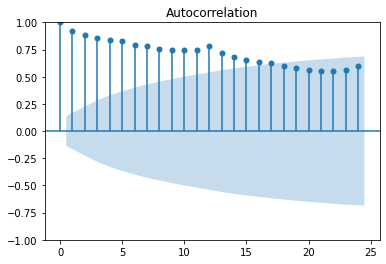

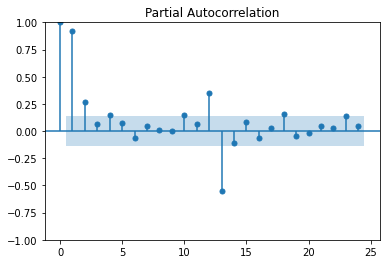

In [261]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
fig = plot_acf(df)
fig2 = plot_pacf(df, method="ywm")

In [262]:
# Variance Stabilizing Transformation(VST) by Taking Logarithm
# 로그를 취해주면서 변동폭 축소
df_vst = np.log(df.value)
df_vst.head()

date
1991-07-01    1.260332
1991-08-01    1.157161
1991-09-01    1.179338
1991-10-01    1.283986
1991-11-01    1.271408
Name: value, dtype: float64

In [263]:
# De-trend by Differencing
# 2차 차분의 경우 = Delta2_Z(t) = Z(t) - Z(t 1) -(Z(t 1) - Z(t 2)) = Z(t) - 2Z(t 1) + Z(t 2)
# 1차 차분에 대해 다시 차분
# 차분을 통해 추세제거
df_vst_diff1 = df_vst.diff(1).dropna()
df_vst_diff1.head()

date
1991-08-01   -0.103170
1991-09-01    0.022177
1991-10-01    0.104647
1991-11-01   -0.012578
1991-12-01    0.188688
Name: value, dtype: float64

In [264]:
# Stationary Process : De-seasonality by Seasonal Differencing
# 계절요인 제거를 위해 1년단위 차분
df_vst_diff1_diff12 = df_vst_diff1.diff(12).dropna()    # 1년 12개월 단위

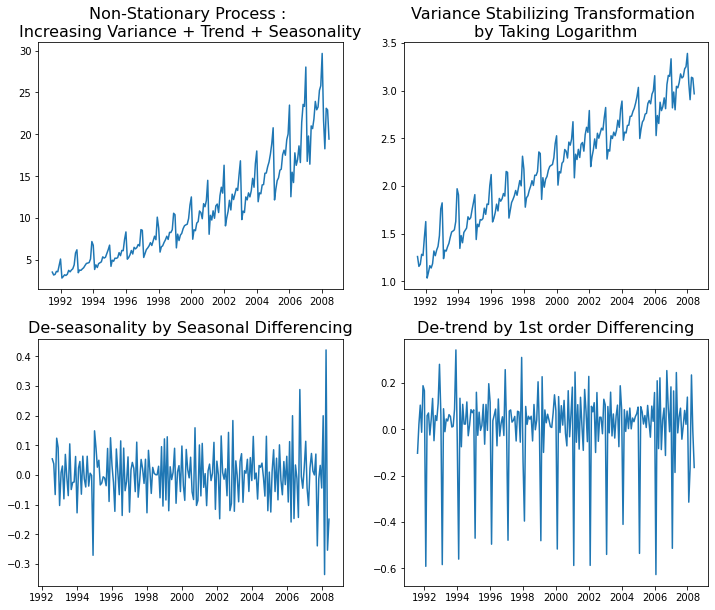

In [265]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

axes[0,0].set_title("Non-Stationary Process : \nIncreasing Variance + Trend + Seasonality", fontsize=16)
axes[0,0].plot(df)

axes[0,1].set_title("Variance Stabilizing Transformation \nby Taking Logarithm", fontsize=16)
axes[0,1].plot(df_vst)

axes[1,1].set_title("De-trend by 1st order Differencing", fontsize=16)
axes[1,1].plot(df_vst_diff1)

axes[1,0].set_title("De-seasonality by Seasonal Differencing", fontsize=16)
axes[1,0].plot(df_vst_diff1_diff12)


plt.show()

## 시계열 모형 종류
1. AR(p) - 자기 회귀 모형
2. MA(q) - 이동평균 모형
3. ARMA(p,q)
4. ARIMA(p,d,q) - 자기회귀누적이동평균 모형 : 차수의 개수(d)는 거의 2를 넘지 않음
5. SARIMA(Seasonal ARIMA) - 계절 자기회귀이동평균 모형

#### AR 모형 실습
* statsmodels.tsa.arima_process.ArmaProcess
* class statsmodels.tsa.arima_process.ArmaProcess(ar=None, ma=None, nobs=100)
* Parameters

**ar** : [array_like](https://numpy.org/doc/stable/glossary.html#term-array_like "(in NumPy v1.22)")

Coefficient for autoregressive lag polynomial, including zero lag. Must be entered using the signs from the lag polynomial representation. See the notes for more information about the sign.

**ma** : [array_like](https://numpy.org/doc/stable/glossary.html#term-array_like "(in NumPy v1.22)")

Coefficient for moving-average lag polynomial, including zero lag.

**nobs** : [`int`](https://docs.python.org/3/library/functions.html#int "(in Python v3.10)"),  `optional`

Length of simulated time series. Used, for example, if a sample is generated. See example.

In [266]:
# AR 모형 실습
from statsmodels.tsa.arima_process import ArmaProcess

# ArmaProcess로 모형 생성하고 nobs 만큼 샘플 생성
def gen_arma_samples(ar,ma,nobs) :
    arma_model = ArmaProcess(ar=ar, ma=ma) # 모형 정의
    arma_samples = arma_model.generate_sample(nobs) # 샘플 생성
    return arma_samples

# drift가 있는 모형은 ArmaProcess에서 처리가 안 되어서 수동으로 정의해줘야 함
# drift → 절편 존재
def gen_random_walk_w_drift(nobs, drift) :
    init = np.random.normal(size=1, loc=0)
    e = np.random.normal(size=nobs, scale=1)
    y = np.zeros(nobs)
    y[0] = init
    for t in (1,nobs) :
        y[t] = drift + 1*y[t-1] + e[t]
        return y

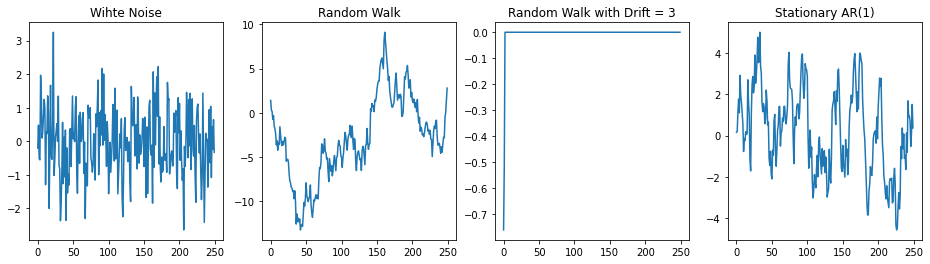

In [267]:
# 백색 잡음 모형, 임의 보행 모형, 표류가 있는 임의 보행 모형,
# 정상성을 만족하는 pi=0.9인 AR(1)모형을 각각 250개씩 샘플을 생성하여 그림
np.random.seed(12345)

white_noise = gen_arma_samples(ar=[1], ma=[1], nobs=250)
# y_t = epsilon_t
# y_{t-1} = 0  /  pi = 0, c = 0
random_walk = gen_arma_samples(ar=[1,-1], ma=[1], nobs=250)
# (1-L)y_t = epsilon_t
# y_t = Ly_{t-1}  /  타임랙 적용  /  ∴ (1-L)y_t = epsilon_t
random_walk_w_drift = gen_random_walk_w_drift(250,2)
# y_t = 2 + y_{t-1} + epsilon_t
# c, 즉 드리프트 적용함
stationary_ar_1 = gen_arma_samples(ar=[1,-0.9], ma=[1], nobs=250)
# (1 - 0,9L)y_t = epsilon_t
# -1 < pi < 1 인 y_t = c + pi_1*y_{t-1} + epsilon_t

fig, ax = plt.subplots(1,4)
ax[0].plot(white_noise)
ax[0].set_title("Wihte Noise", fontsize=12)

ax[1].plot(random_walk)
ax[1].set_title("Random Walk", fontsize=12)

ax[2].plot(random_walk_w_drift)
ax[2].set_title("Random Walk with Drift = 3")

ax[3].plot(stationary_ar_1)
ax[3].set_title("Stationary AR(1)")

fig.set_size_inches(16, 4)

plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


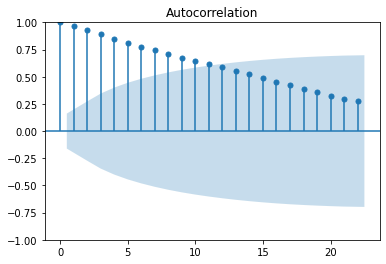

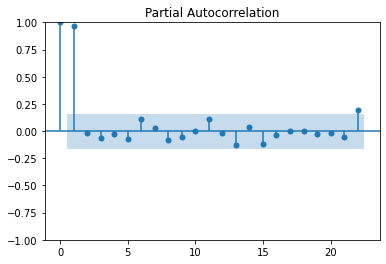

In [268]:
plot_acf(df_apple_monthly["Close"])
plot_pacf(df_apple_monthly["Close"])
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


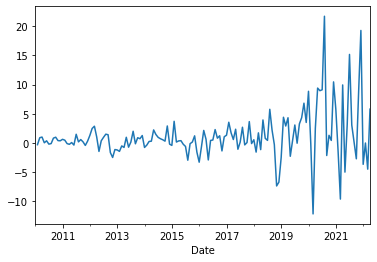

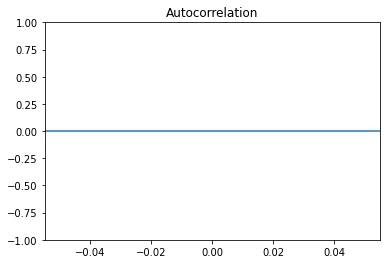

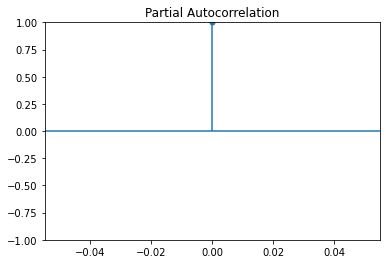

In [269]:
diff_1 = df_apple_monthly["Close"].diff(1)
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [316]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_apple_monthly["Close"], order=(2,0,1), trend="c")
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  148
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -425.281
Date:                Mon, 18 Apr 2022   AIC                            860.563
Time:                        17:41:11   BIC                            875.549
Sample:                    01-31-2010   HQIC                           866.652
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.9938     76.423      1.112      0.266     -64.793     234.781
ar.L1          0.0097      0.400      0.024      0.981      -0.775       0.794
ar.L2          0.9875      0.393      2.511      0.0

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


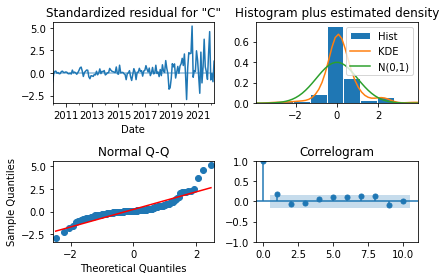

In [310]:
model_fit.plot_diagnostics().tight_layout()

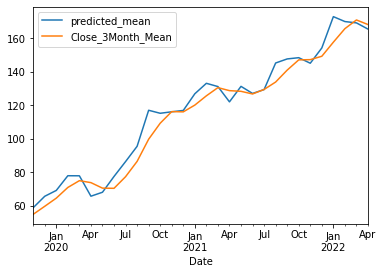

In [309]:
model_fit.predict().tail(30).plot()
df_apple_monthly["Close_3Month_Mean"].tail(30).plot()
plt.legend()